# Summary

<p class="lead">This notebook summarizes the realtime-kinetic measurements.
</p>

## Requirement

Before running this notebook, you need to pre-process the data with:

- [8-spot bubble-bubble kinetics - Run-All](8-spot bubble-bubble kinetics - Run-All.ipynb)

This pre-processing analyzes the 3 measurement data files, 
compute the moving-window slices, the number of bursts 
and fits the population fractions. All results are saved as TXT in 
the [results](results) folder.

The present notebook loads these results and presents a summary.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import time
start_time = time.time()
time.ctime()

'Tue Oct 11 09:49:16 2016'

In [3]:
import analysis

numpy: 1.11.1
numba: 0.28.1
lmfit: 0.9.5


In [4]:
import models

In [5]:
filenames = ['multispot_2015-07-%d_'+f for f in [
    'bubble-bubble-run-off-kinetics-800mW-steer110_12',
    'bubble-bubble-open-complex-run-off-kinetics-600mW-steer110_7',
    'bubble-bubble-run-off-kinetics-800mW-steer110_8']]
filenames = [f % d for f, d in zip(filenames, (31, 29, 30))]
filenames

['multispot_2015-07-31_bubble-bubble-run-off-kinetics-800mW-steer110_12',
 'multispot_2015-07-29_bubble-bubble-open-complex-run-off-kinetics-600mW-steer110_7',
 'multispot_2015-07-30_bubble-bubble-run-off-kinetics-800mW-steer110_8']

# Measurement 0

  PRE Number of bursts (detrended):  2107.4 MEAN, 11441.3 VAR,  5.429 VAR/MEAN
 POST Number of bursts (detrended):  1526.9 MEAN,  7578.7 VAR,  4.964 VAR/MEAN
POST2 Number of bursts (detrended):  2155.3 MEAN,  8513.3 VAR,  3.950 VAR/MEAN
  PRE Kinetics 30s:     1.910 STD, 0.349 STD detrended.
 POST Kinetics 30s:     2.940 STD, 0.634 STD detrended.
POST2 Kinetics 30s:     2.707 STD, 0.758 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=5s) = 183.6s  tau(w=30s) = 169.2s  Delta = 7.8%
 FIT  Window Exp (t0_vary=False):  tau(w=5s) = 186.4s  tau(w=30s) = 186.1s  Delta = 0.2%
 FIT  Simple Exp (t0_vary=True):  tau(w=5s) = 164.2s  tau(w=30s) = 166.6s  Delta = -1.4%
 FIT  Window Exp (t0_vary=True):  tau(w=5s) = 163.8s  tau(w=30s) = 163.5s  Delta = 0.2%


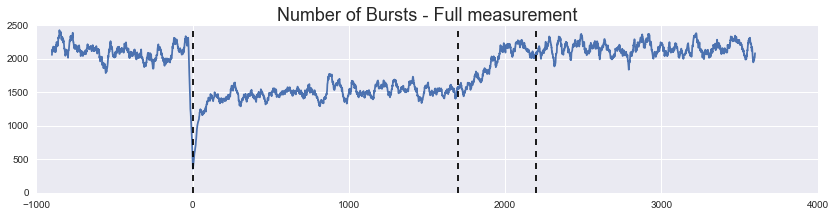

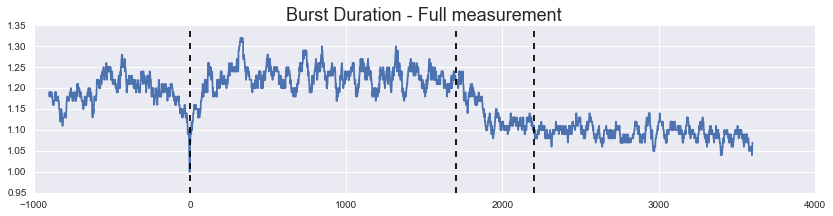

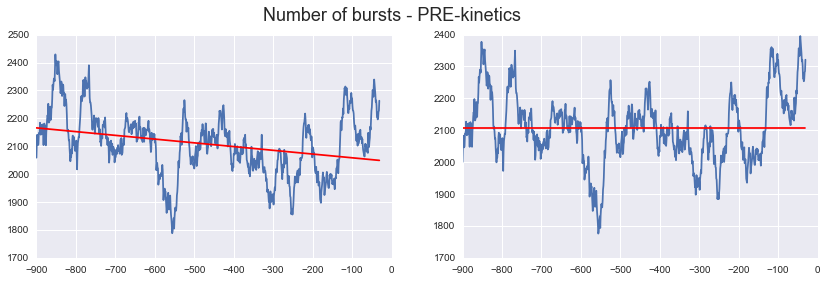

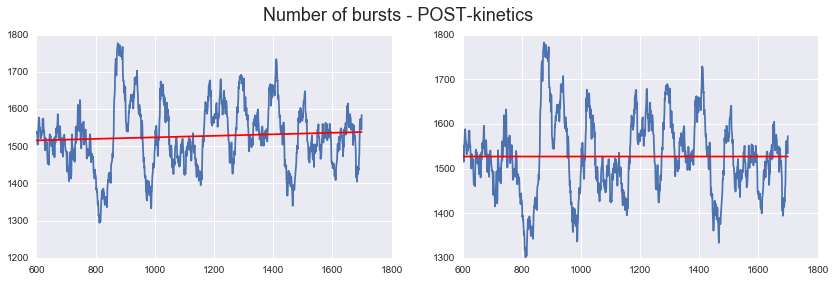

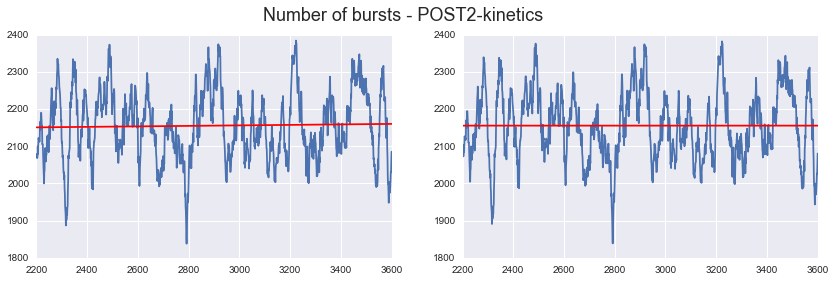

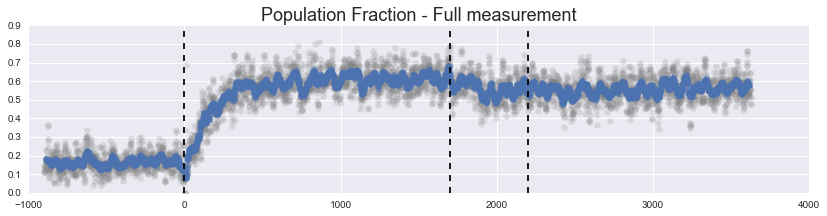

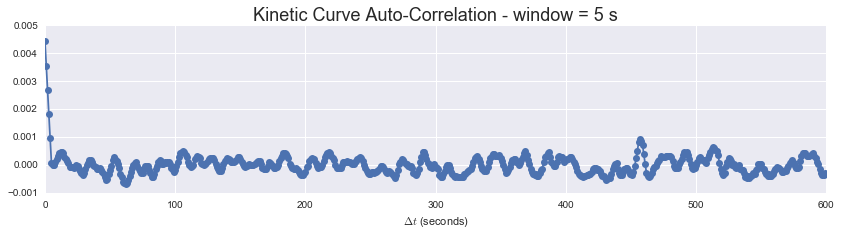

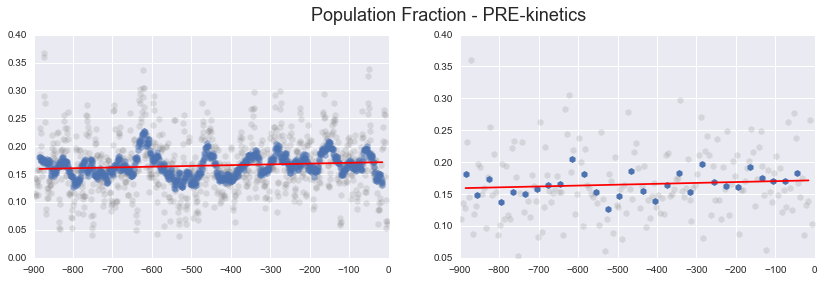

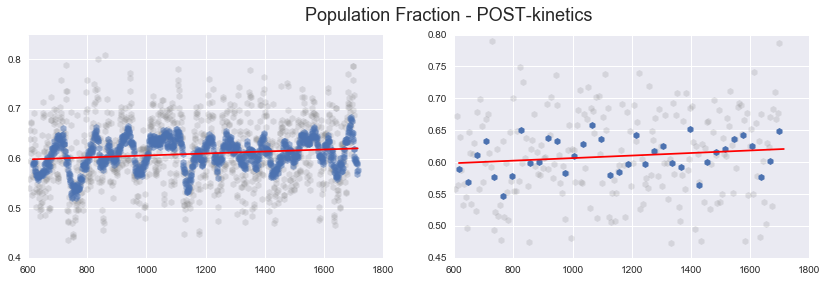

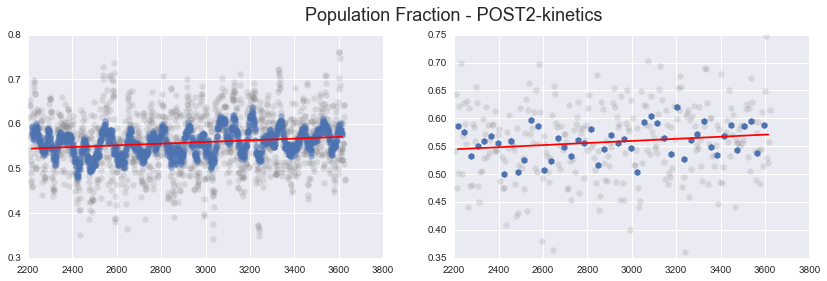

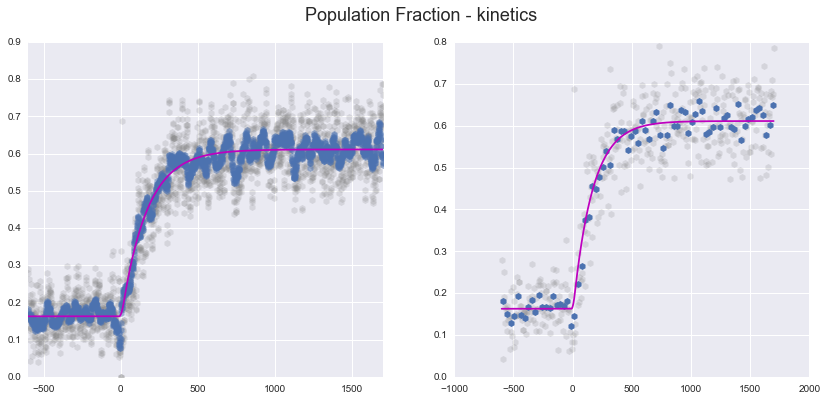

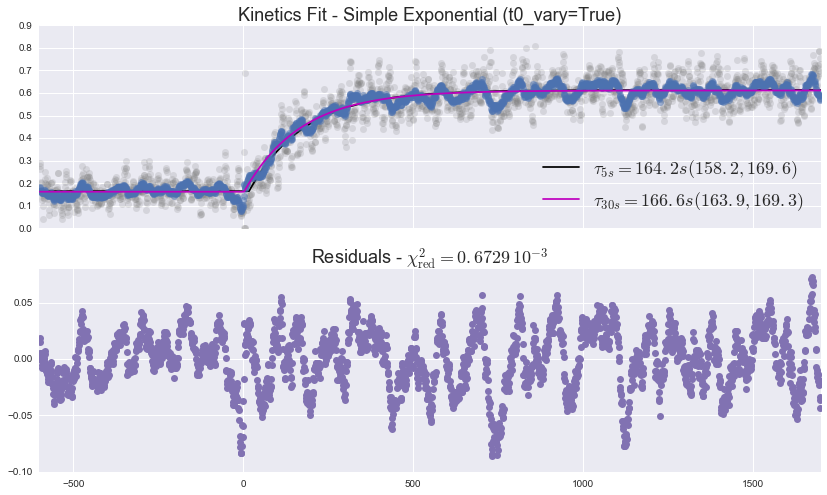

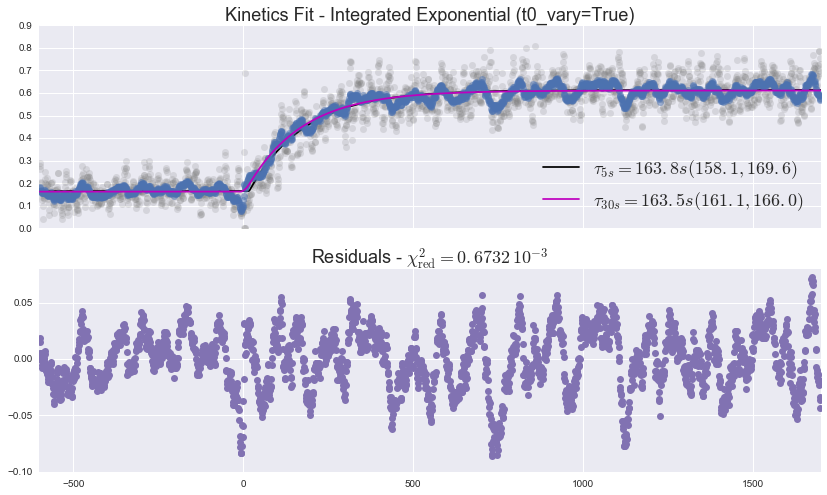

In [6]:
meas_id = 0
fitres, params = analysis.process(filenames[meas_id], post = (600, 1700), post2_start=2200)

In [7]:
res, resw, rest0f, reswt0f, ci, ciw = fitres

In [8]:
res[30].best_values

{'final_value': 0.61143382736653906,
 'init_value': 0.16225863647770761,
 't0': 2.4654004383584818,
 'tau': 166.5552091801585}

In [9]:
import lmfit

In [10]:
res[30].best_values

{'final_value': 0.61143382736653906,
 'init_value': 0.16225863647770761,
 't0': 2.4654004383584818,
 'tau': 166.5552091801585}

In [11]:
resw[30].best_values

{'decimation': 5,
 'final_value': 0.61113940875058759,
 'init_value': 0.16256360068986686,
 'sigma': 0,
 't0': 19.929171118497514,
 't_window': 30,
 'tau': 163.50806434762902}

In [12]:
methods, windows, step = analysis._get_methods_windows_step(filenames[0])

In [13]:
[res[k].redchi for k in sorted(res)]

[0.004161399048193291, 0.00067287526939391307, 0.00029921519235193785]

In [14]:
[resw[k].redchi for k in sorted(resw)]

[0.0041615122563631009, 0.00067320645193437543, 0.00030355814216865293]

In [15]:
tau = {k: r.best_values['tau'] for k, r in res.items()}
tauw = {k: r.best_values['tau'] for k, r in resw.items()}

In [16]:
tau

{5: 164.19004515054351, 30: 166.5552091801585, 60: 161.76541258802143}

In [17]:
tauw

{5: 163.82477484176275, 30: 163.50806434762902, 60: 157.80904969108445}

In [18]:
p = {window: params['em', window, 1] for window in windows}

## Plot FRET hist evolution

In [19]:
def gauss3():
    peak1 = lmfit.models.GaussianModel(prefix='p1_')
    peak3 = lmfit.models.GaussianModel(prefix='p3_')
    peak2 = lmfit.models.GaussianModel(prefix='p2_')
    model = peak1 + peak2 + peak3
    model.set_param_hint('p1_center', value=0, min=0, max=0.2)
    model.set_param_hint('p2_center', value=0.5, min=0, max=1)
    model.set_param_hint('p3_center', value=0.9, min=0.8, max=1)
    model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.2)
    model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.2)
    model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.1)
    model.set_param_hint('p1_amplitude', value=1, min=0.01)
    model.set_param_hint('p2_amplitude', value=1, min=0.01)
    model.set_param_hint('p3_amplitude', value=1, min=0.01)
    model.name = '3 gauss peaks'
    return model

In [20]:
model = gauss3()

In [21]:
px = p[60]

In [22]:
p_names = ('p1_center', 'p1_sigma', 
           'p2_amplitude', 'p2_center', 'p2_sigma',
           'p3_amplitude', 'p3_center', 'p3_sigma')
params = px.loc[:, p_names]
params['p1_amplitude'] = 1 - params.p2_amplitude - params.p3_amplitude

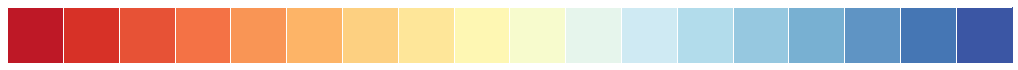

In [23]:
E = np.arange(-0.1, 1.11, 0.001)
time = np.arange(-0, 530, 30)
c = sns.color_palette('RdYlBu', len(time))
sns.palplot(c)

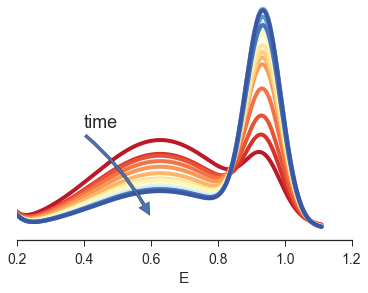

In [24]:
sns.set(font_scale=1.4)
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(6, 4))
    for i, t in enumerate(time):
        y_dist = model.eval(x=E, **dict(params.loc[t]))
        plt.plot(E, y_dist, 
                 lw=4, alpha=1, color=c[i % len(c)], label='%d s' % t)

    plt.xlim(0.2)
    #plt.ylim(0, 4)
    plt.xlabel('E')
    plt.ylabel('PDF')
    
    ax.text(0.4, 1.6, 'time', fontsize=18)
    #ax.arrow(0.5, 1.5, 0.2, -1, head_width=0.1, head_length=0.1, overhang=0.2, lw=2, fc='k', ec='k')
    ax.annotate('', xy=(0.6, 0.2,), xytext=(0.4, 1.5), size=15,
                arrowprops=dict(
                                arrowstyle="simple,head_length=0.8,head_width=0.8,tail_width=0.2", 
                                #arrowstyle="->,head_length=0.8,head_width=0.4", 
                                connectionstyle="arc3,rad=-0.1"),
                                color=1,)
    ax.yaxis.set_visible(False)
    sns.despine(fig, ax, trim=True, offset=10, left=True)
    #plt.legend()
    plt.savefig('figures/paper_fig_rk_E_hist.png', dpi=200, bbox_inches='tight')

## Load quenched kinetics data

In [25]:
quenchk = pd.DataFrame.from_csv('quenched_kinetics.txt')
quenchk.index.name = 'time'
quenchk.columns=['kinetics']
quenchk.T

time,15,30,60,120,180,300,480,780,1200
kinetics,0.05852,0.1046,0.30983,0.434,0.64508,0.8609,0.88167,0.83907,0.87321


For visualization, normalize quenched kinetics data to same initial and final values as realtime kinetics:

In [26]:
qk_init, qk_final = float(quenchk.iloc[0]), float(quenchk.iloc[-1])
qk_init, qk_final

(0.05852, 0.87321)

In [27]:
w = windows[1]
rk_init = resw[w].best_values['init_value']
rk_final = resw[w].best_values['final_value']
w, rk_init, rk_final

(30, 0.16256360068986686, 0.61113940875058759)

In [28]:
quenchk['norm_kinetics'] = ((quenchk.kinetics - qk_init)/(qk_final - qk_init)
                            *(rk_final - rk_init) + rk_init)

In [29]:
model = models.factory_model_exp()

In [30]:
qk_res = model.fit(np.array(quenchk.kinetics), t=quenchk.index)

In [31]:
qk_res.best_values

{'final_value': 0.88492356844431397,
 'init_value': 0.0038305763251879066,
 't0': 10.086876335068641,
 'tau': 131.49903058185413}

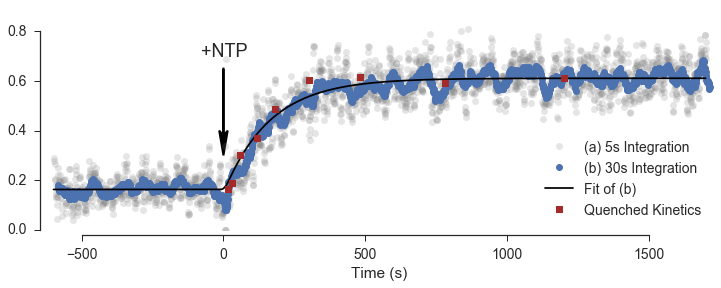

In [32]:
w, wshort = 30, 5
tau_str = (r'$\tau_{%ds} = %.1f s (%.1f, %.1f)$' % (w, tauw[w], ciw[w]['tau'][2][1], ciw[w]['tau'][4][1]))

sns.set(font_scale=1.4)
with sns.axes_style("ticks"): 
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_xlim(-630, 1730)
    ax.plot('tmean', 'kinetics', 'o', alpha=0.2, color='grey', data=p[wshort], label='')
    ax.plot('tmean', 'kinetics', 'o', alpha=1, color=analysis.blue, data=p[w], label='')
    ax.plot(p[w].tstart, models.expwindec_func(p[w].tstart, **resw[w].best_values),
            color='k', label=tau_str)
    #ax.legend(loc='lower right', fontsize=18);
    ax.plot('norm_kinetics', data=quenchk, ls='', marker='s', color='brown')
    ax.set_xlabel('Time (s)')
    ax.legend(loc='lower right', 
              labels=['(a) 5s Integration', '(b) 30s Integration', 'Fit of (b)', 'Quenched Kinetics'],
              fontsize=14)
    ax.text(-80, 0.7, '+NTP', fontsize=18)
    ax.arrow(0, 0.65, 0, -0.25, head_width=30, head_length=0.1, overhang=0.2, lw=2, fc='k', ec='k')
    ax.set_yticks(np.arange(0, 1, 0.2))
    sns.despine(fig, ax, trim=True, offset=5)
    plt.savefig('figures/paper_fig_kinetics.png', dpi=200, bbox_inches='tight')

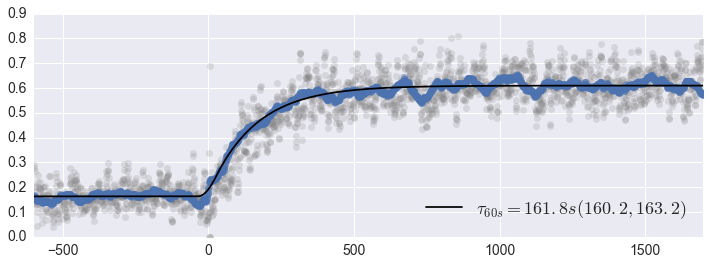

In [33]:
w, wshort = 60, 5
tau_str = (r'$\tau_{%ds} = %.1f s (%.1f, %.1f)$' % (w, tau[w], ci[w]['tau'][2][1], ci[w]['tau'][4][1]))

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(-600, 1700)
ax.plot('tstart', 'kinetics', 'o', alpha=0.2, color='grey', data=p[wshort], label='')
ax.plot('tstart', 'kinetics', 'o', alpha=0.5, color=analysis.blue, data=p[w], label='')
ax.plot(p[w].tstart, models.expwindec_func(p[w].tstart, **resw[w].best_values),
        color='k', label=tau_str)
ax.legend(loc='lower right', fontsize=18)

## Save Fit Results in DataFrame

### Create DataFrame

In [34]:
index = pd.MultiIndex.from_product([(0, 1, 2), windows, (True, False), (True, False)], 
                                   names=['meas_id', 'window', 'integr', 't0_vary'])
index

MultiIndex(levels=[[0, 1, 2], [5, 30, 60], [False, True], [False, True]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['meas_id', 'window', 'integr', 't0_vary'])

In [35]:
fitdata = pd.DataFrame(index=index, columns=['tau', 't0', 'init_value', 'final_value', 'redchi'], dtype=float)
fitdata = fitdata.sort_index()
#fitdata.head()

### Fill DataFrame

In [36]:
meas_id

0

In [37]:
for i, w in enumerate(windows):
    fitdata.loc[meas_id, w, False, True] = {**res[w].best_values, 'redchi': res[w].redchi*1e3} 
    fitdata.loc[meas_id, w, False, False] = {**rest0f[w].best_values, 'redchi': rest0f[w].redchi*1e3} 
    fitdata.loc[meas_id, w, True, True] = {**resw[w].best_values, 'redchi': resw[w].redchi*1e3}
    fitdata.loc[meas_id, w, True, False] = {**reswt0f[w].best_values, 'redchi': reswt0f[w].redchi*1e3}

In [38]:
fitdata.head()

tau         t0  init_value  final_value  \
meas_id window integr t0_vary                                                   
0       5      False  False    183.611616   0.000000    0.162261     0.615514   
                      True     164.190045  17.078754    0.164771     0.613527   
               True   False    186.431689   0.000000    0.161932     0.615809   
                      True     163.824775  19.808516    0.164821     0.613491   
        30     False  False    169.219088   0.000000    0.161857     0.611694   

                                 redchi  
meas_id window integr t0_vary            
0       5      False  False    4.194970  
                      True     4.161399  
               True   False    4.205071  
                      True     4.161512  
        30     False  False    0.673172

In [39]:
assert (fitdata.loc[pd.IndexSlice[meas_id, :, :, False], 't0'] == 0).all()

# Measurement 1

  PRE Number of bursts (detrended):  1259.5 MEAN,  8054.8 VAR,  6.395 VAR/MEAN
 POST Number of bursts (detrended):   829.8 MEAN,  2896.6 VAR,  3.491 VAR/MEAN
POST2 Number of bursts (detrended):  1214.9 MEAN,  4534.8 VAR,  3.733 VAR/MEAN
  PRE Kinetics 30s:     2.846 STD, 1.689 STD detrended.
 POST Kinetics 30s:     4.074 STD, 0.308 STD detrended.
POST2 Kinetics 30s:     3.243 STD, 0.767 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=5s) = 168.8s  tau(w=30s) = 156.9s  Delta = 7.1%
 FIT  Window Exp (t0_vary=False):  tau(w=5s) = 153.7s  tau(w=30s) = 174.1s  Delta = -13.2%
 FIT  Simple Exp (t0_vary=True):  tau(w=5s) = 116.4s  tau(w=30s) = 120.6s  Delta = -3.6%
 FIT  Window Exp (t0_vary=True):  tau(w=5s) = 116.7s  tau(w=30s) = 120.7s  Delta = -3.4%


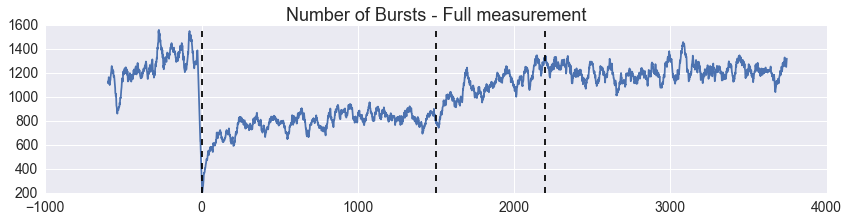

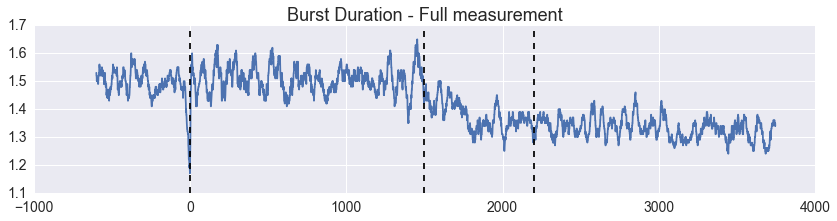

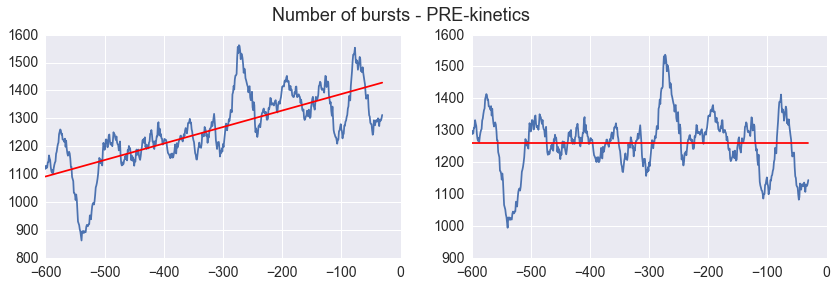

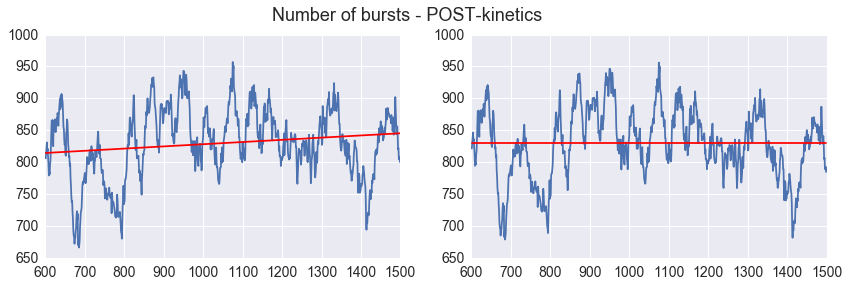

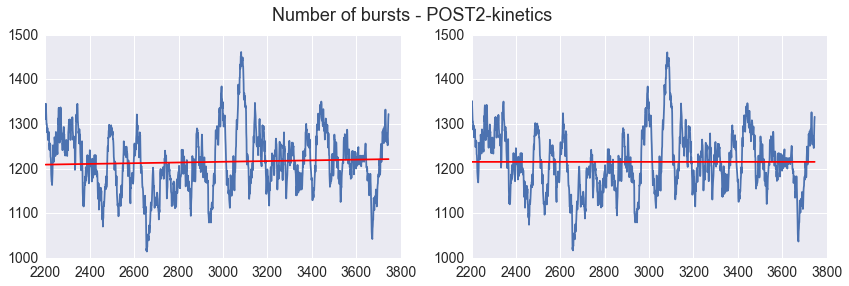

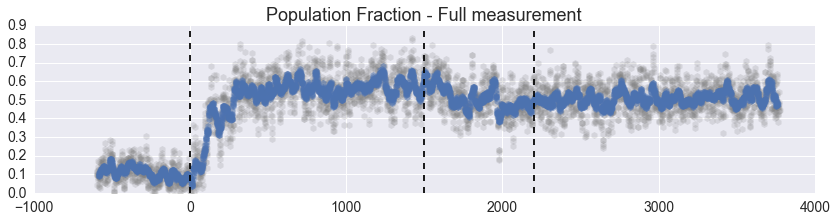

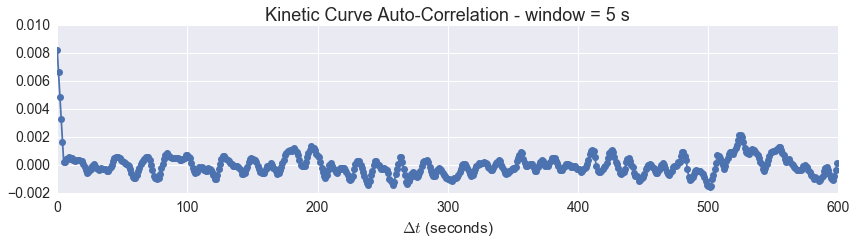

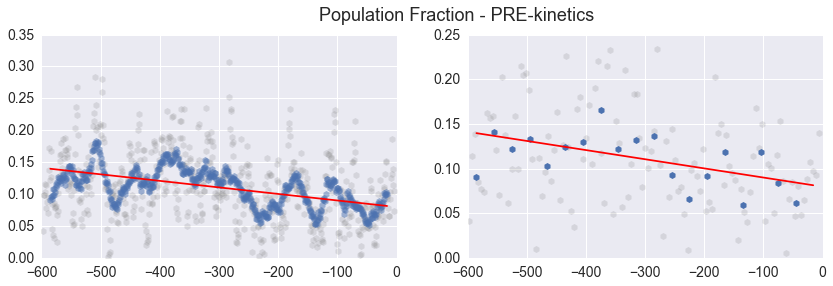

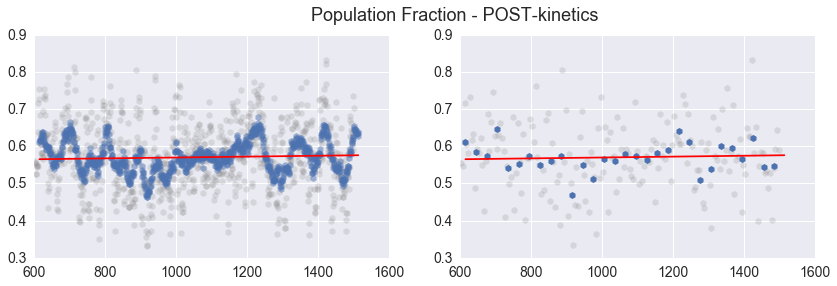

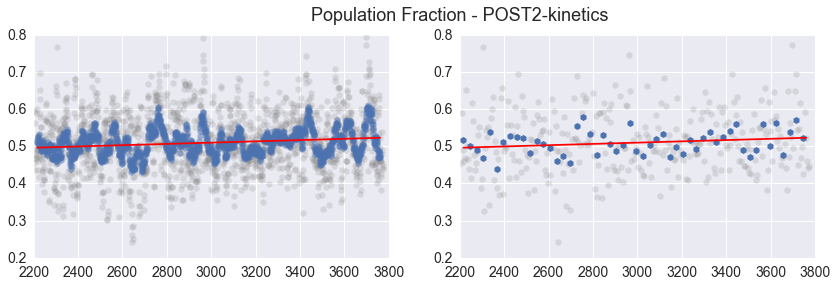

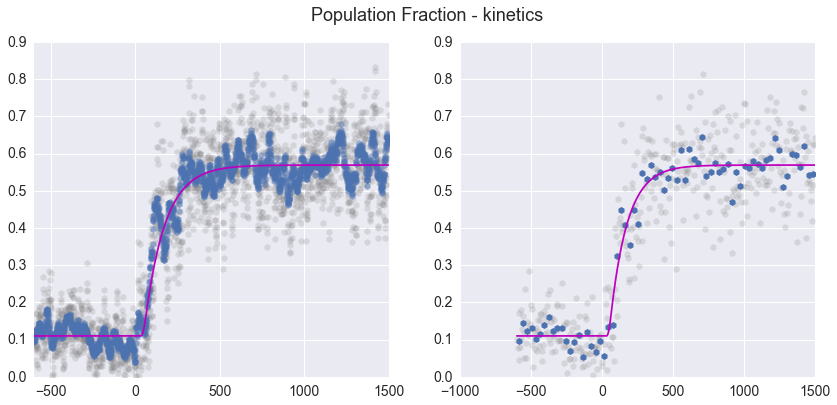

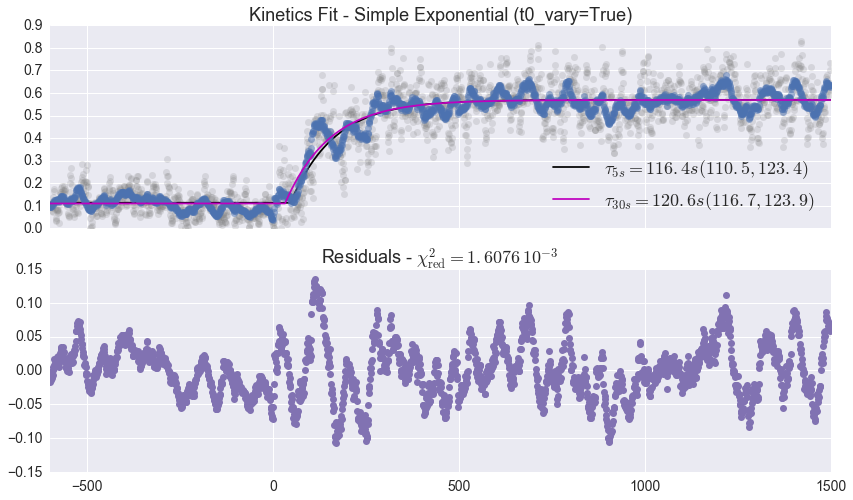

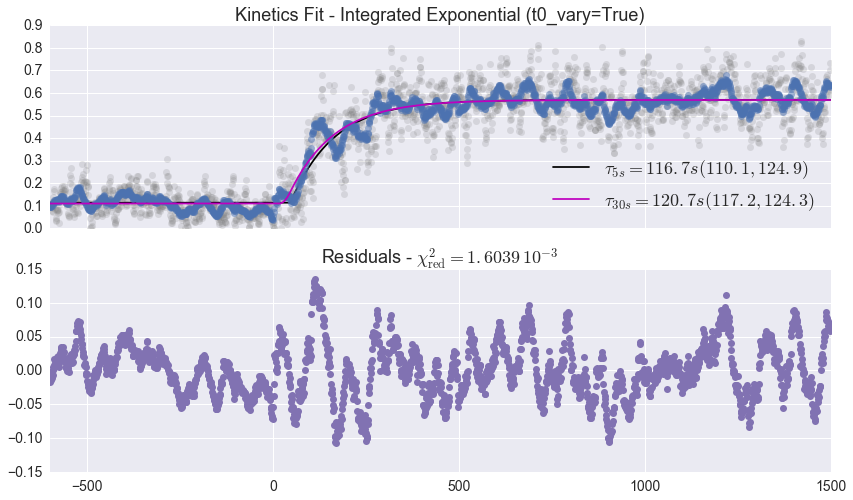

In [40]:
meas_id = 1
fitres, params = analysis.process(filenames[meas_id], post = (600, 1500), post2_start=2200)

In [41]:
params = analysis.load_fit_data(filenames[meas_id])

In [42]:
kin = (-600, 1600)
p1 = params['em', 5, 1]
p2 = params['em', 30, 1]
p3 = params['em', 60, 1]
p2.index = p2.tstart
p2k = p2.loc[kin[0]:kin[1]]
p3.index = p3.tstart
p3k = p3.loc[kin[0]:kin[1]]

In [43]:
methods, windows, step = analysis._get_methods_windows_step(filenames[1])
decimation = 5
method = 'nelder'
windows

[5, 30, 60]

In [44]:
t0_vary = True
modelw3 = models.factory_model_expwin(tau=150, t_window=windows[2], decimation=decimation, t0_vary=t0_vary)
resw3 = modelw3.fit(np.array(p3k.kinetics), t=p3k.tstart, verbose=False, method=method)
resw3 = modelw3.fit(np.array(p3k.kinetics), t=p3k.tstart, verbose=False)
resw3.best_values

{'decimation': 5,
 'final_value': 0.57112808197768239,
 'init_value': 0.10858474269780688,
 'sigma': 0,
 't0': 41.708453304204568,
 't_window': 60,
 'tau': 128.45730947805765}

In [45]:
t0_vary = True
modelw2 = models.factory_model_expwin(tau=150, t_window=windows[1], decimation=decimation, t0_vary=t0_vary)
resw2 = modelw2.fit(np.array(p2k.kinetics), t=p2k.tstart, verbose=False, method=method)
resw2 = modelw2.fit(np.array(p2k.kinetics), t=p2k.tstart, verbose=False)
resw2.best_values

{'decimation': 5,
 'final_value': 0.57130626300580456,
 'init_value': 0.1097517149052824,
 'sigma': 0,
 't0': 46.25972803879889,
 't_window': 30,
 'tau': 123.5217645024355}

(-600, 1600)

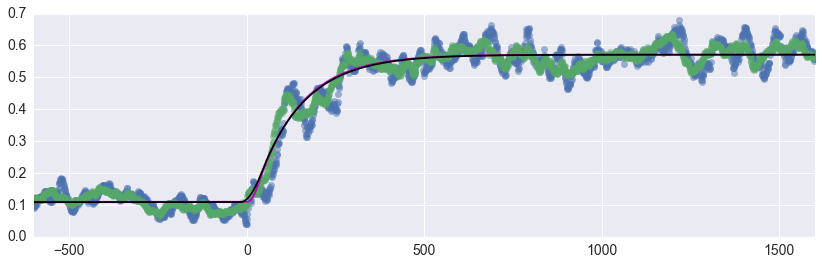

In [46]:
fig_width = 14
fig, ax = plt.subplots(figsize=(fig_width, 4))
#ax.plot('tstart', 'kinetics', 'o', alpha=0.2, color='grey', data=p1)
ax.plot('tstart', 'kinetics', 'o', alpha=0.5, data=p2k)
ax.plot('tstart', 'kinetics', 'o', alpha=0.5, data=p3k)
ax.plot(p2k.tstart-15, models.expwindec_func(p2k.tstart, **resw2.best_values), 'm')
ax.plot(p3k.tstart, models.expwindec_func(p3k.tstart, **resw3.best_values), 'k')
ax.set_xlim(kin[0], kin[1])
# ax.text(kin[0]+50, 0.62, r'$\tau_{5s} = %.1f s (%.1f, %.1f)$' % (tauw1, ciw1['tau'][2][1], ciw1['tau'][4][1]), fontsize=18)
#ax.text(kin[0]+50, 0.52, r'$\tau_{30s} = %.1f s (%.1f, %.1f)$' % (tauw2, ciw2['tau'][2][1], ciw2['tau'][4][1]), fontsize=18)
# title = 'Kinetics Fit - Intergrated Exponential (t0_vary=%s)' % t0_vary
# ax.set_title(title, fontsize=fs)

## Save results 1

In [47]:
meas_id

1

In [48]:
methods, windows, step = analysis._get_methods_windows_step(filenames[meas_id])
res, resw, rest0f, reswt0f, ci, ciw = fitres

for i, w in enumerate(windows):
    fitdata.loc[meas_id, w, False, True] = {**res[w].best_values, 'redchi': res[w].redchi*1e3} 
    fitdata.loc[meas_id, w, False, False] = {**rest0f[w].best_values, 'redchi': rest0f[w].redchi*1e3} 
    fitdata.loc[meas_id, w, True, True] = {**resw[w].best_values, 'redchi': resw[w].redchi*1e3}
    fitdata.loc[meas_id, w, True, False] = {**reswt0f[w].best_values, 'redchi': reswt0f[w].redchi*1e3}

In [49]:
assert (fitdata.loc[pd.IndexSlice[meas_id, :, :, False], 't0'] == 0).all()

# Measurement 2

  PRE Number of bursts (detrended):  1488.2 MEAN, 11869.6 VAR,  7.976 VAR/MEAN
 POST Number of bursts (detrended):  1082.9 MEAN,  3898.1 VAR,  3.600 VAR/MEAN
POST2 Number of bursts (detrended):  1470.0 MEAN,  5569.3 VAR,  3.789 VAR/MEAN
  PRE Kinetics 30s:     2.245 STD, 0.876 STD detrended.
 POST Kinetics 30s:     3.759 STD, 1.080 STD detrended.
POST2 Kinetics 30s:     3.129 STD, 1.099 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=5s) = 176.7s  tau(w=30s) = 165.8s  Delta = 6.2%
 FIT  Window Exp (t0_vary=False):  tau(w=5s) = 176.0s  tau(w=30s) = 183.5s  Delta = -4.3%
 FIT  Simple Exp (t0_vary=True):  tau(w=5s) = 161.9s  tau(w=30s) = 168.8s  Delta = -4.2%
 FIT  Window Exp (t0_vary=True):  tau(w=5s) = 161.7s  tau(w=30s) = 168.2s  Delta = -4.0%


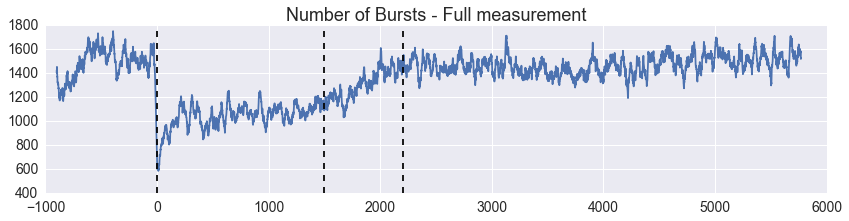

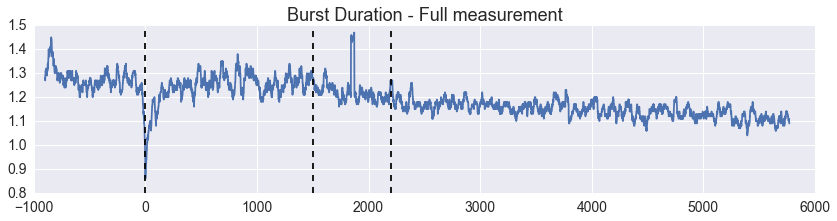

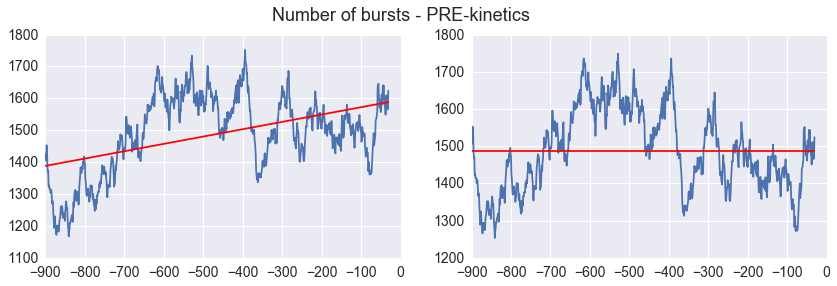

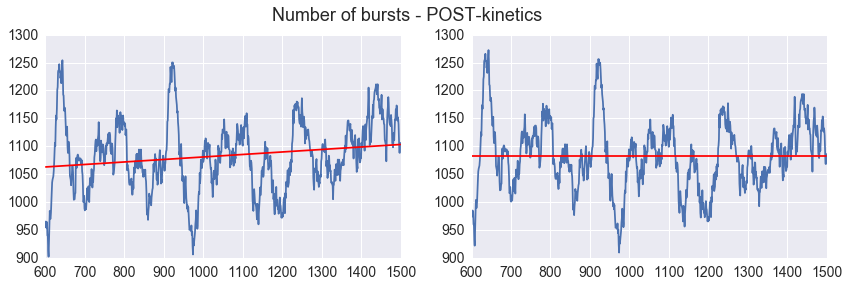

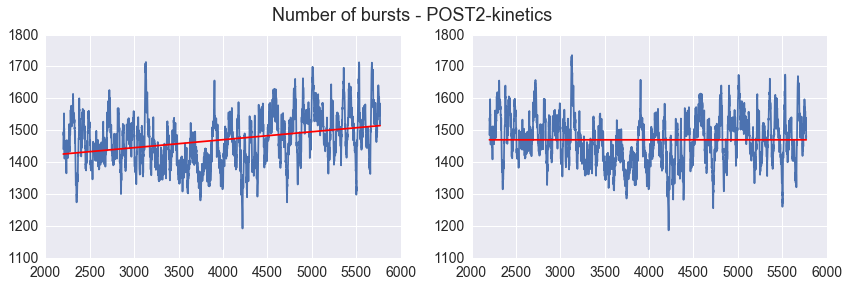

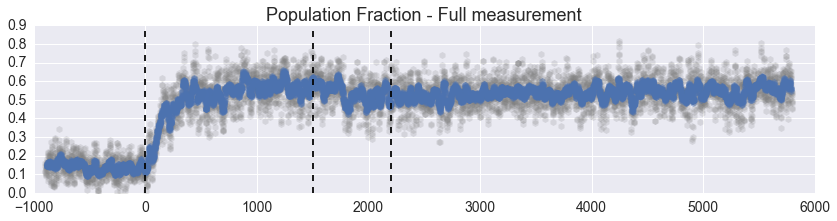

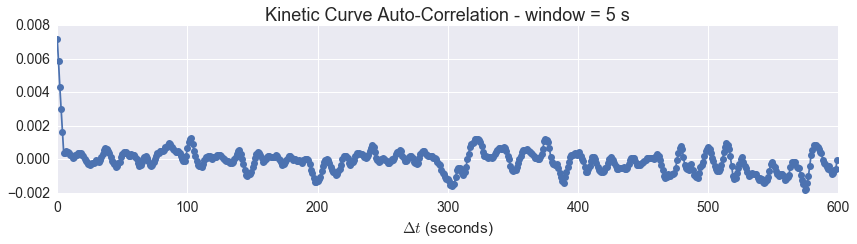

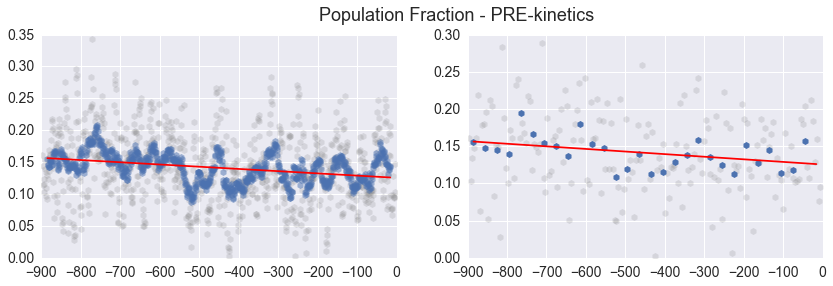

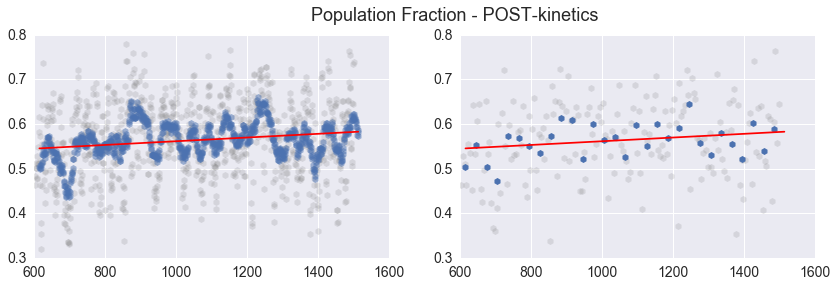

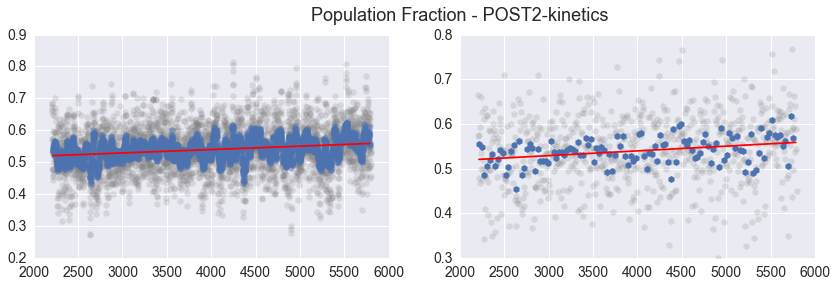

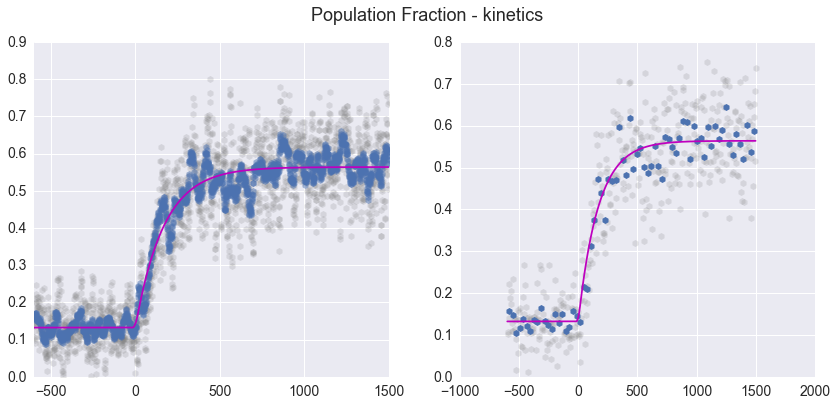

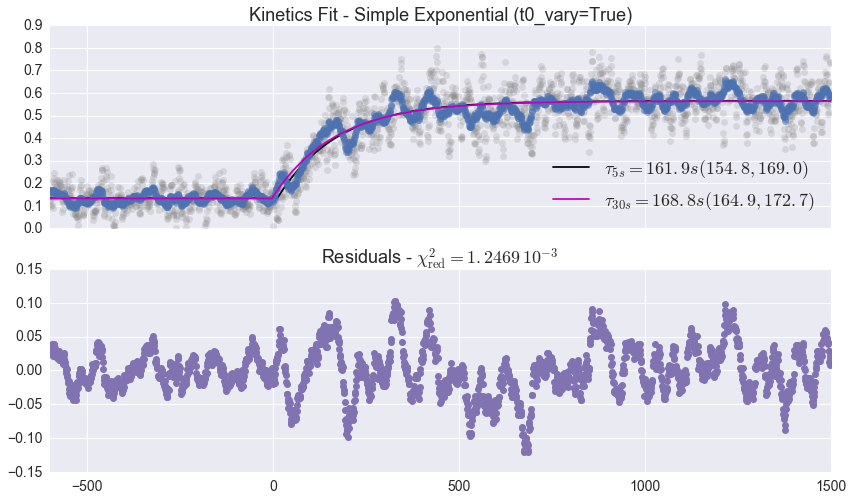

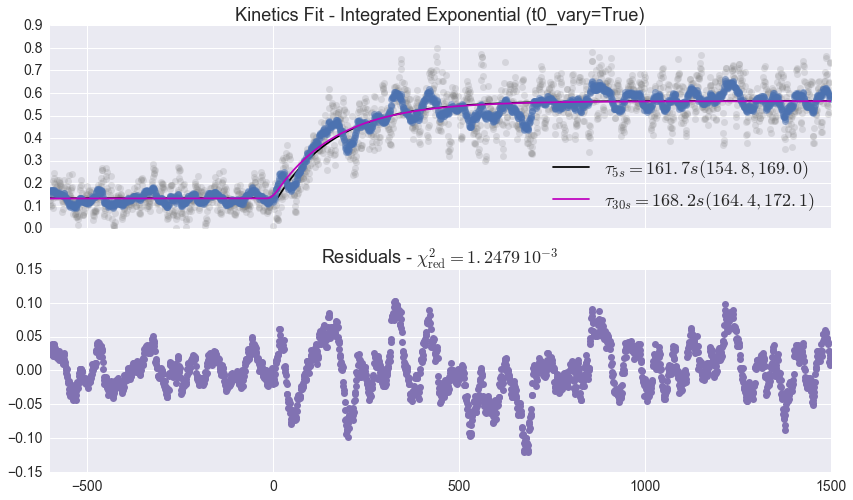

In [50]:
meas_id = 2
fitres, params = analysis.process(filenames[meas_id], post = (600, 1500), post2_start=2200)

## Save results 2

In [51]:
meas_id

2

In [52]:
methods, windows, step = analysis._get_methods_windows_step(filenames[meas_id])
res, resw, rest0f, reswt0f, ci, ciw = fitres

for i, w in enumerate(windows):
    fitdata.loc[meas_id, w, False, True] = {**res[w].best_values, 'redchi': res[w].redchi*1e3} 
    fitdata.loc[meas_id, w, False, False] = {**rest0f[w].best_values, 'redchi': rest0f[w].redchi*1e3} 
    fitdata.loc[meas_id, w, True, True] = {**resw[w].best_values, 'redchi': resw[w].redchi*1e3}
    fitdata.loc[meas_id, w, True, False] = {**reswt0f[w].best_values, 'redchi': reswt0f[w].redchi*1e3}

In [53]:
assert (fitdata.loc[pd.IndexSlice[meas_id, :, :, False], 't0'] == 0).all()

In [54]:
fitdata.sortlevel(0, axis=0, inplace=True)

In [55]:
df = fitdata.xs((False, True), level=('integr', 't0_vary'))
dfw = fitdata.xs((True, True), level=('integr', 't0_vary'))

In [56]:
#fitdata.loc[(slice(None), slice(30,60), True, True), ]

In [57]:
dfw - df

tau         t0  init_value  final_value    redchi
meas_id window                                                        
0       5      -0.365270   2.729762    0.000050    -0.000036  0.000113
        30     -3.047145  17.463771    0.000305    -0.000294  0.000331
        60     -3.956363  32.658007    0.000025    -0.000358  0.004343
1       5       0.330832 -13.901431   -0.000051     0.000038  0.000167
        30      0.117892  14.365002   -0.000269     0.000008 -0.003695
        60     -1.460669  29.995647   -0.000582    -0.000146 -0.002856
2       5      -0.143224  -0.470829    0.000019    -0.000015  0.000241
        30     -0.509594  15.092182   -0.000077    -0.000058  0.000973
        60     -3.516812  31.799738   -0.000181    -0.000416 -0.001412

In [58]:
fitdata = fitdata.round({'tau': 1, 't0': 1, 'init_value': 3, 'final_value': 3, 'redchi': 3})
fitdata.head()

tau    t0  init_value  final_value  redchi
meas_id window integr t0_vary                                              
0       5      False  False    183.6   0.0       0.162        0.616   4.195
                      True     164.2  17.1       0.165        0.614   4.161
               True   False    186.4   0.0       0.162        0.616   4.205
                      True     163.8  19.8       0.165        0.613   4.162
        30     False  False    169.2   0.0       0.162        0.612   0.673

In [59]:
fitdata.to_csv('results/8-spot-bubble-bubble-fitdata.csv')

----

In [60]:
import time
print('Execution duration: %d s' % (time.time() - start_time))

Execution duration: 83 s
